Classifying Digits: The purpose of this exercise is to use SKLearn and classify the load_digits dataset. load_digits is a dataset of digits, with each datapoint being a 8x8 image of a digit. 

(sklearn.datasets.load_digits - http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html)

* Visualize the first a few digits to get a better understanding of the data
* With x as data and y as target, classify the above datasets into individual targets using a decision tree
* Perform this classification task with sklearn.svm.SVC. Check how the choice of kernel affects the results?
* Perform this classification task with sklearn.ensemble.RandomForestClassifier. Analyze the impact each of the parameter had on the result
* Try a few sets of parameters for each model and check the F1 score (sklearn.metrics.f1_score) on the results. Output the best F1 score that was achieve.

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
digits = load_digits()

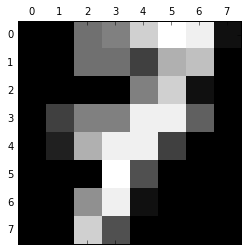

In [2]:
import pylab as pl 
pl.gray() 
pl.matshow(digits.images[7]) 
pl.show() 

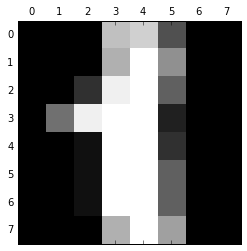

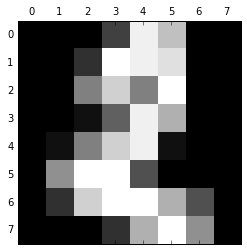

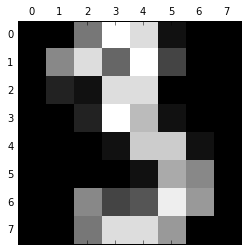

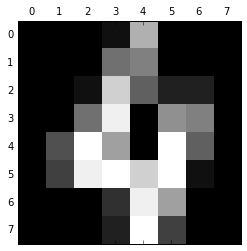

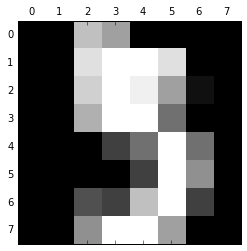

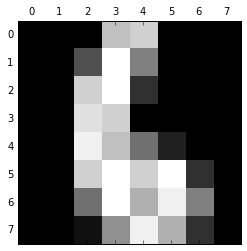

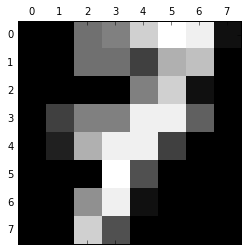

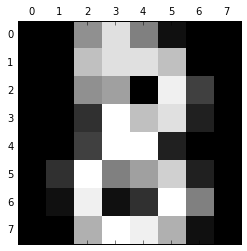

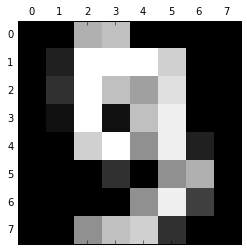

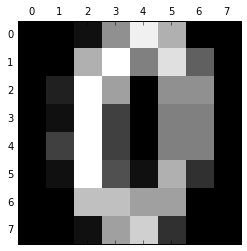

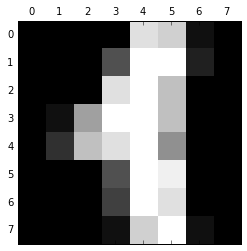

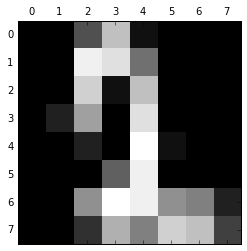

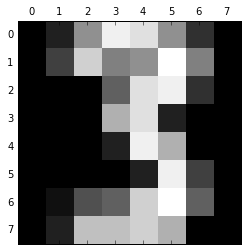

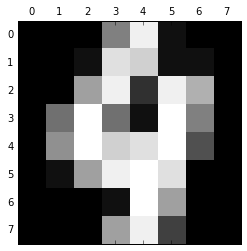

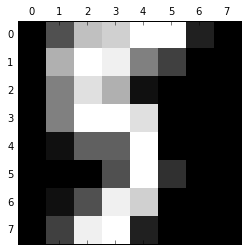

In [3]:
# 1. Visualize the first 15 digits to get a better understanding of the data

for i in range(1,16):
    pl.matshow(digits.images[i]) 
    pl.show() 

In [4]:
# 2. With x as data and y as target, classify the above datasets into individual targets using a decision tree

from sklearn.cross_validation import train_test_split
X, test_X, Y, test_Y = train_test_split(digits.data,digits.target, test_size=0.25, random_state=4)

In [5]:
## Using decision tree classifier, an f1_score of .91 is achieved 

from sklearn import tree,metrics
import random

# Number of images
n = len(digits.images)


# Create the decision tree classifier
clf = tree.DecisionTreeClassifier(criterion = 'entropy',random_state = 200) ## Fixed random_state = 200 to get consistent result on every run
clf = clf.fit(X,Y)

# Pictorially represent the decision tree
from sklearn.externals.six import StringIO
with open('digits.dot', 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)       
import os
os.unlink('digits.dot')
from sklearn.externals.six import StringIO  
from IPython.display import Image 
import pydot
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph.write_pdf('digits.pdf') # Decision tree is exported into digits.pdf dataset


## The decision tree is too huge to display inline. So I have expored into PDF. Howerver, the following code can be 
## Used to print a decision tree inline

# with open("digits.dot", 'w') as f:
#     f = tree.export_graphviz(clf, out_file=f)
#     !dot -Tpng digits.dot -o digits.png
# imshow(digits.png)

 
# Test the fit on the training data
predicted = clf.predict(X)
print 'Score for training data =', clf.score(X,Y)

# Test the model on the test data
predicted2 = clf.predict(test_X)
expected2 = digits.target[test_Y]

print 'Score for test data =', clf.score(test_X,test_Y)

d = {'predicted':predicted2, 'expected': expected2}

df = pd.DataFrame(data=d)

f1score = metrics.f1_score(expected2, predicted2, average = 'weighted')
print 'f1 score =' , f1score
print '\n'
print 'Sample of data which could not be matched'
df[df.predicted != df.expected].head(10)


Score for training data = 1.0
Score for test data = 0.911111111111
f1 score = 0.911539159804


Sample of data which could not be matched


,expected,predicted
0,6,8
9,8,7
20,9,7
22,8,5
33,1,7
38,1,5
43,3,5
44,2,8
64,1,3
71,4,5


In [6]:
# 3. Perform this classification task with sklearn.svm.SVC. 
# Choice of kernel question is addressed later

## In this section, I am just looking at the results from the default inputs.
## The results with default parameters is very poor with a score less than 0.5. 
## So I have tweaked the parameters in the next section.


import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
digits = datasets.load_digits()

# Number of images
n = len(digits.images)

# Convert the image matrix into a flatter matrix
digit_dat = digits.images.reshape(n, -1)

# Create the classifier
classify = svm.SVC()

# Split the data into two portions 1. Learn 2. Predict
# 1. Use the fit function on the first half of the data - Learn
predicted = classify.fit(X,Y)
print 'Score for training data with default parameters =', classify.score(X,Y), '\n'
 
# 2. Use the predict function on the second half of the data to predict
expected2 = test_Y
predicted2 = classify.predict(test_X)
print 'Score for test data with default parameters =', classify.score(test_X,test_Y), '\n'


print("Classification report %s:\n%s\n" % (classify, metrics.classification_report(expected2, predicted2)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected2, predicted2))


Score for training data with default parameters = 1.0 

Score for test data with default parameters = 0.484444444444 

Classification report SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.40      0.57        48
          1       1.00      0.72      0.84        39
          2       1.00      0.35      0.52        48
          3       0.16      1.00      0.27        43
          4       1.00      0.67      0.80        42
          5       1.00      0.37      0.54        49
          6       1.00      0.72      0.84        39
          7       1.00      0.39      0.56        49
          8       1.00      0.14      0.24        43
          9       1.00      0.24      0.39        50

avg / total       0.92      0.48      0.55       450


Confusion matrix:
[[19  0  0 

In [7]:
## To understand the working of SVM.SVC better I have tweaked the parameters in this section
## Impact of kernel is addressed in the next section
## In this section, I tweaked the parameters gamma and C to obtain better results 
## with the kernel choice of 'rbf' (which is the default)
## gamma = 0.001 and C=1.0 have given the best results with and f1_score of .99

import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
digits = datasets.load_digits()

# Number of images
n = len(digits.images)

# Convert the image matrix into a flatter matrix
digit_dat = digits.images.reshape(n, -1)

# Create the classifier
classify = svm.SVC(gamma=0.001, C=1.0)

# Split the data into two portions 1. Learn 2. Predict
# 1. Use the fit function on the first half of the data - Learn
predicted = classify.fit(X, Y)
print 'Score for training data with gamma = 0.001 and C = 1.0 =', classify.score(digits.data[:3*n/4],digits.target[:3*n/4]), '\n'
 
# 2. Use the predict function on the second half of the data to predict
expected2 = test_Y
predicted2 = classify.predict(test_X)
print 'Score for test data with default parameters gamma = 0.001 and C = 1.0 =', classify.score(test_X,test_Y), '\n'


print("Classification report %s:\n%s\n" % (classify, metrics.classification_report(expected2, predicted2)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected2, predicted2))


Score for training data with gamma = 0.001 and C = 1.0 = 0.997772828508 

Score for test data with default parameters gamma = 0.001 and C = 1.0 = 0.988888888889 

Classification report SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3,
  gamma=0.001, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        48
          1       0.95      1.00      0.97        39
          2       1.00      1.00      1.00        48
          3       0.98      1.00      0.99        43
          4       1.00      1.00      1.00        42
          5       1.00      0.98      0.99        49
          6       1.00      0.97      0.99        39
          7       1.00      1.00      1.00        49
          8       0.98      0.95      0.96        43
          9       0.98      0.98      0.98        50

avg / total       0.99      0.99      

Metrics for comparision for several kernel options 
    kernel  rsq_score      time
0      rbf   0.988889  0.100759
1     poly   0.986667  0.047796
2   linear   0.980000  0.040370
3  sigmoid   0.700000  0.326487


array([<matplotlib.axes._subplots.AxesSubplot object at 0x10b117310>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x110d2d190>], dtype=object)

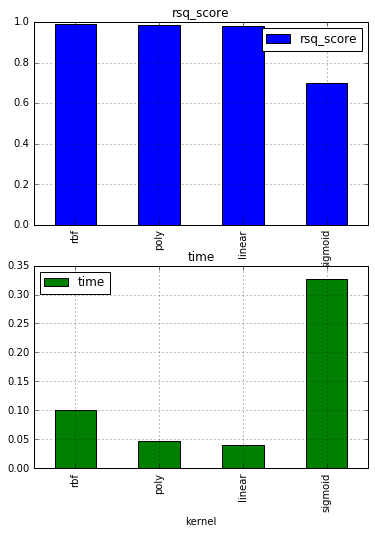

In [8]:
# How does the choice of kernel affect the results?

# Since we found that gamma = 0.001 and C = 1 provides the best results in the previous section, 
# I am assuming these values for the parameters
# to understand the impact of kernel

# Answer: The choice of kernel impacts the precision of the classifier by modifying the shape of the boundary. 
# I ran the following options of Kernels and obtained the metrics as follows
#     kernel  rsq_score      time
# 0      rbf   0.988889  0.110145
# 1     poly   0.986667  0.046837
# 2   linear   0.980000  0.039517
# 3  sigmoid   0.700000  0.317273
# Kernel choice 'rbs' seems to provide the best RSquare and precision and comparatively lower time of exection.
# The performance of 'rbs' is followed by the kernel choice 'poly' with RSquare and precision similar to that of 'rbf'
# but with a slightly smaller run time.


import time
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics


def iter_svc(k):
    digits = datasets.load_digits()
    n = len(digits.images)
    # Convert the image matrix into a flatter matrix
    digit_dat = digits.images.reshape(n, -1)
    t1=time.time()
    # Create the classifier
    classify = svm.SVC(kernel=k, gamma = 0.001, C = 1.0)
    # Split the data into two portions 1. Learn 2. Predict
    # Use the fit function on the first half of the data - Learn
    classify.fit(X, Y)
    # Use the predict function on the second half of the data to predict
    expected = test_Y
    predicted = classify.predict(test_X)
    t2=time.time()
    rsq=classify.score(test_X,test_Y)
    tme=t2-t1
    # Used the folowing commented print statements to get the f1 score and precision
#     print("Classification report %s:\n%s\n" % (classify, metrics.classification_report(expected, predicted)))
    return  k, tme, rsq
    
k1, tme1, rsq1 = iter_svc('rbf')
k2, tme2, rsq2 = iter_svc('poly')
k3, tme3, rsq3 = iter_svc('linear')
k4, tme4, rsq4 = iter_svc('sigmoid')

k_f = [k1,k2,k3,k4]
tme_f = [tme1,tme2,tme3,tme4]
rsq_f = [rsq1,rsq2,rsq3,rsq4]

d = {'kernel':k_f, 'time': tme_f, 'rsq_score': rsq_f}

df = pd.DataFrame(data=d)

print 'Metrics for comparision for several kernel options', '\n', df

# Plotting a bar graph of Rsquare value and time taken using each choice of kernel
df.plot(kind = 'bar', x = 'kernel', grid = True, subplots = True, sharex = False, figsize=(6,8))


In [9]:
# 4.  Perform this classification task with sklearn.ensemble.RandomForestClassifier. 
# Write in the markdown below the impact each of the parammeter had on the result
#     1. max_depth: 
#     2. max_features:
#     3. n_estimators:


## In this section I am iterating to select the seed with best f1_score with default parameters. This is to maintain
## consistent results when the code is run multiple times
## From the output below seed = 2557 has provided the best score

import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
digits = datasets.load_digits()
import numpy as np
import pandas as pd

n = len(digits.images)

# Convert the image matrix into a flatter matrix
digit_dat = digits.images.reshape(n, -1)

sd1=[]
f1score1 = []

from sklearn.cross_validation import train_test_split
features_train, features_test, targets_train, targets_test = train_test_split(digits.data,digits.target, test_size=0.25, random_state=4)

for sd in range(15000):
    random.seed(sd)
    # Create the classifier
    classify = RandomForestClassifier()
    # Split the data into two portions 1. Learn 2. Predict
    # Use the fit function on the first half of the data - Learn
    classify.fit(features_train, targets_train)
    # Use the predict function on the second half of the data to predict
    expected = targets_test
    predicted = classify.predict(features_test)
    f1score = metrics.f1_score(expected, predicted, average = 'weighted')
    sd1.append(sd)
    f1score1.append(f1score)

    
d = {'seeds':sd1, 'f1score': f1score1}

df = pd.DataFrame(data=d)


# Print top 5 f1score with best f1score
df.sort('f1score' , ascending = 0).head(5)
    

,f1score,seeds
3513,0.980074,3513
4609,0.979868,4609
12116,0.977900,12116
12798,0.977866,12798
12699,0.977852,12699


In [10]:
# Check the preformance of Random Forest Classifier with default metrics by fixing the seed selected in the previous step

import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
digits = datasets.load_digits()

n = len(digits.images)

# Convert the image matrix into a flatter matrix
digit_dat = digits.images.reshape(n, -1)

random.seed(2557)

# Create the classifier
classify = RandomForestClassifier()

# Split the data into two portions 1. Learn 2. Predict
# Use the fit function on the first half of the data - Learn
classify.fit(features_train, targets_train)
 
# Use the predict function on the second half of the data to predict
expected = targets_test
predicted = classify.predict(features_test)


f1score = metrics.f1_score(expected, predicted, average = 'weighted')

print "F1 score with default parameters = ", f1score, '\n'
print("Classification report %s:\n%s\n" % (classify, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

F1 score with default parameters =  0.964518569333 

Classification report RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False):
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        48
          1       0.93      0.95      0.94        39
          2       0.98      0.98      0.98        48
          3       0.93      0.95      0.94        43
          4       0.98      0.98      0.98        42
          5       0.96      0.94      0.95        49
          6       1.00      0.97      0.99        39
          7       1.00      1.00      1.00        49
          8       0.95      0.93      0.94        43
          9       0.92      0.94    

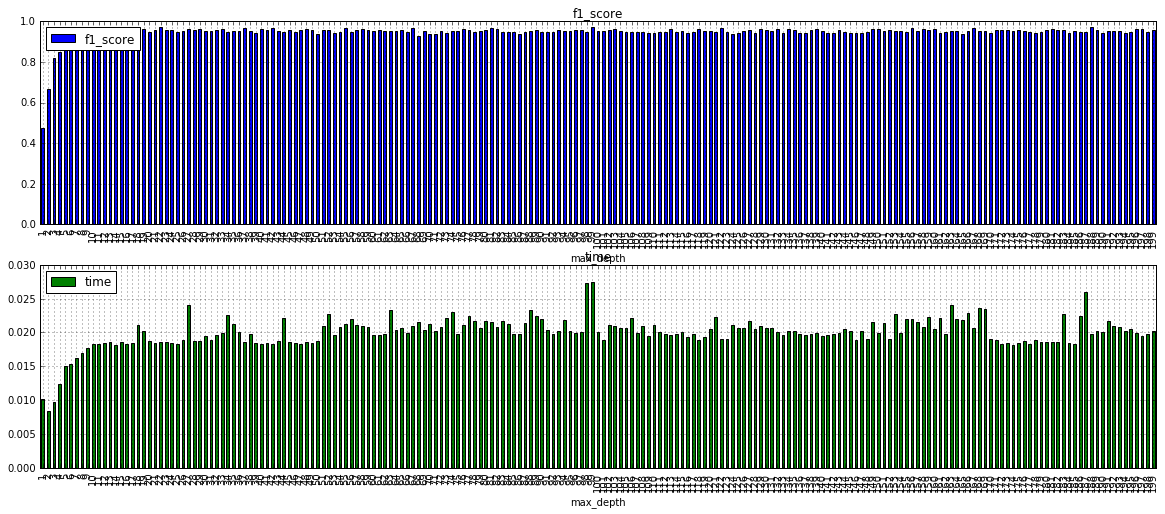

     f1_score  max_depth      time
21   0.971346         22  0.018552
98   0.971188         99  0.027539
187  0.971166        188  0.019731
66   0.969040         67  0.020930
155  0.968897        156  0.022064


In [12]:
## To understand the impact of max_depth parameter on the Random Forest Classifier
## I have iterated this with 200 values in the code below and max_depth = 22 gives the best results in this case

import time
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
digits = datasets.load_digits()
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline

md1 = []
tme1 = []
f1score1 = []

random.seed(2557)

for md in range(1,200):
    n = len(digits.images)
    t1=time.time()
    # Create the classifier
    classify = RandomForestClassifier(max_depth = md)
    # Split the data into two portions 1. Learn 2. Predict
    # Use the fit function on the first half of the data - Learn
    classify.fit(features_train, targets_train)
    # Use the predict function on the second half of the data to predict
    expected = targets_test
    predicted = classify.predict(features_test)
    t2=time.time()
    f1score = metrics.f1_score(expected, predicted, average = 'weighted')
    tme=t2-t1
    md1.append(md)
    tme1.append(tme)
    f1score1.append(f1score)


d = {'max_depth':md1, 'time': tme1, 'f1_score': f1score1}

df = pd.DataFrame(data=d)

# Plotting a bar graph of Rsquare value and time taken using each choice of kernel
df.plot(kind = 'bar', x = 'max_depth', grid = True, subplots = True, sharex = False, figsize=(20,8))

plt.show()

print df.sort(['f1_score'],ascending = 0).head(5)

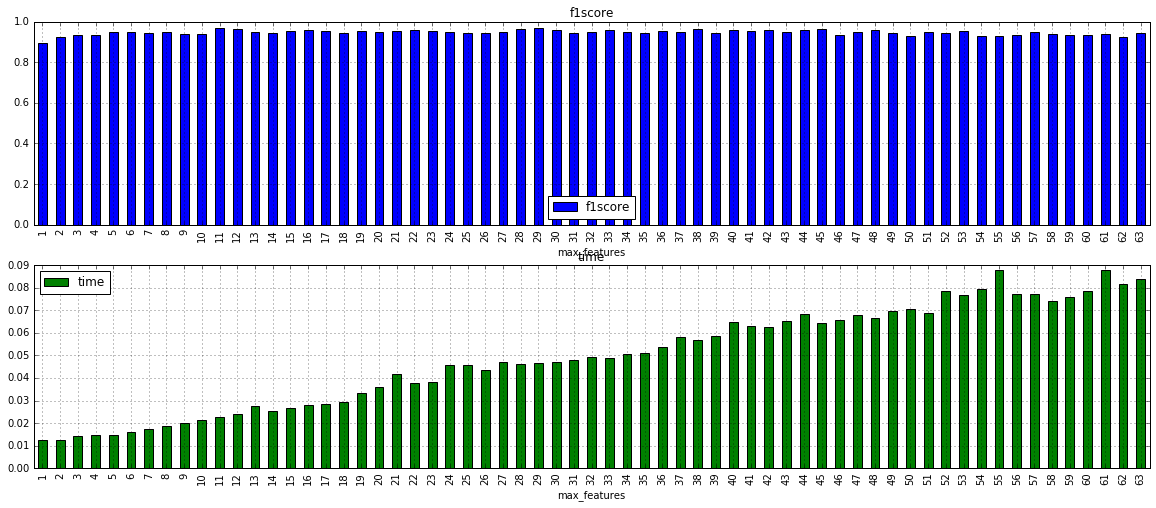

     f1score  max_features      time
10  0.968989            11  0.022580
28  0.966943            29  0.046738
27  0.966477            28  0.046123
44  0.964807            45  0.064527
11  0.964498            12  0.024123


In [13]:
## To understand the impact of max_features on Random Forest Classifier
## As per the learning from the previous step, keeping the max_depth=22 to ensure good fit
## max_features = auto is the best option in this case. No other option is making any positive impact on the data

import time
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
digits = datasets.load_digits()
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline

mf1 = []
tme1 = []
f1score1 = []

# max_f = ["sqrt", "log2" ]

max_f = range(1,64)

random.seed(2557)

for mf in max_f:
    n = len(digits.images)
    # Convert the image matrix into a flatter matrix
    digit_dat = digits.images.reshape(n, -1)
    t1=time.time()
    # Create the classifier
    classify = RandomForestClassifier(max_depth = 22, max_features = mf)
    # Split the data into two portions 1. Learn 2. Predict
    # Use the fit function on the first half of the data - Learn
    classify.fit(features_train, targets_train)
    # Use the predict function on the second half of the data to predict
    expected = targets_test
    predicted = classify.predict(features_test)
    t2=time.time()
    f1score = metrics.f1_score(expected, predicted, average = 'weighted')
    tme=t2-t1
    mf1.append(mf)
    tme1.append(tme)
    f1score1.append(f1score)


d = {'max_features':mf1, 'time': tme1, 'f1score': f1score1}

df = pd.DataFrame(data=d)

# Plotting a bar graph of Rsquare value and time taken using each choice of kernel
df.plot(kind = 'bar', x = 'max_features', grid = True, subplots = True, sharex = False, figsize=(20,8))

plt.show()

# Find the max f1 score
print df.sort(['f1score'],ascending = 0).head(5)

## max_features = auto is the best option in this case. No other option is making any positive impact on the data

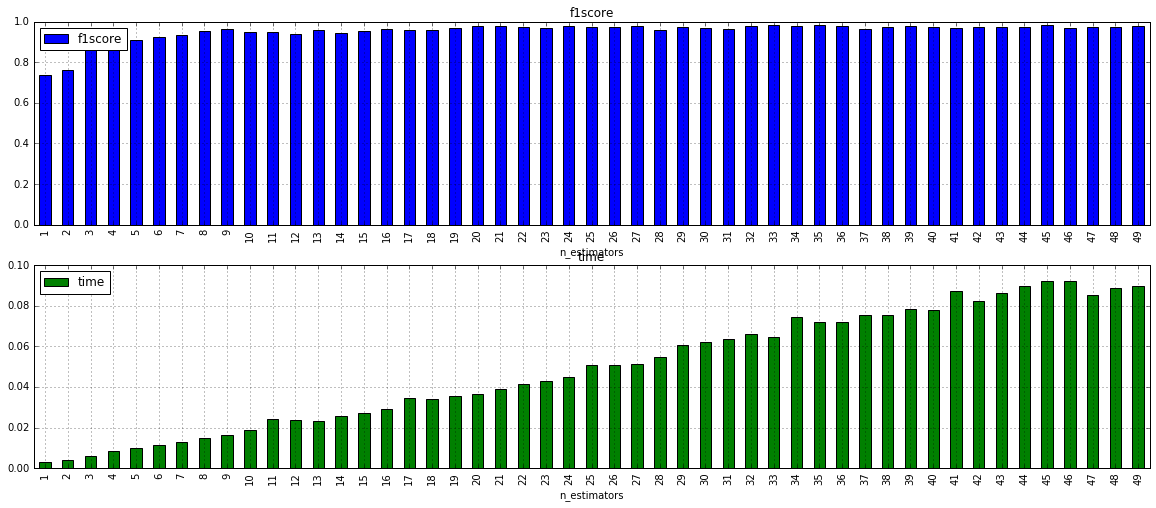

     f1score  n_estimators      time
34  0.984413            35  0.071794
32  0.982310            33  0.064554
44  0.982279            45  0.092410
48  0.980062            49  0.089631
38  0.980036            39  0.078613


In [14]:
## To understand the impact of n_estimators on Random Forest Classifier
## As per the above two steps, assigning the corresponding values:  max_depth = 22 and max_features = auto
## Itererated the model through 50 values for n_estimators 
## n_estimators = 35 slightly improves the f1_score

import time
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
digits = datasets.load_digits()
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline

ne1 = []
tme1 = []
f1score1 = []

random.seed(2557)

for ne in range(1,50):
    n = len(digits.images)
    # Convert the image matrix into a flatter matrix
    digit_dat = digits.images.reshape(n, -1)
    t1=time.time()
    # Create the classifier
    classify = RandomForestClassifier(max_depth = 22, n_estimators = ne )
    # Split the data into two portions 1. Learn 2. Predict
    # Use the fit function on the first half of the data - Learn
    classify.fit(features_train, targets_train)
    # Use the predict function on the second half of the data to predict
    expected = targets_test
    predicted = classify.predict(features_test)
    t2=time.time()
    f1score = metrics.f1_score(expected, predicted, average = 'weighted')
    tme=t2-t1
    ne1.append(ne)
    tme1.append(tme)
    f1score1.append(f1score)


d = {'n_estimators':ne1, 'time': tme1, 'f1score': f1score1}

df = pd.DataFrame(data=d)

# Plotting a bar graph of Rsquare value and time taken using each choice of kernel
df.plot(kind = 'bar', x = 'n_estimators', grid = True, subplots = True, sharex = False, figsize=(20,8))

plt.show()

# Find the max f1 score
print df.sort('f1score' , ascending = 0).head(5)

## n_estimators = 35 slightly improves the f1_score

In [15]:
# Rerun the Random Forest classifier with the following selected parameters 
#     1. max_depth: 22
#     2. max_features: default
#     3. n_estimators: 35


import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
digits = datasets.load_digits()

n = len(digits.images)

# Convert the image matrix into a flatter matrix
digit_dat = digits.images.reshape(n, -1)

random.seed(2557)

# Create the classifier
classify = RandomForestClassifier(max_depth = 22, n_estimators = 35)


# Split the data into two portions 1. Learn 2. Predict
# Use the fit function on the first half of the data - Learn
classify.fit(features_train, targets_train)
# Use the predict function on the second half of the data to predict
expected = targets_test
predicted = classify.predict(features_test)


f1score = metrics.f1_score(expected, predicted, average = 'weighted')

print 'The best f1 score for the decision tree using random forest calssifier is' ,f1score , '\n'

print("Classification report %s:\n%s\n" % (classify, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

The best f1 score for the decision tree using random forest calssifier is 0.975491949722 

Classification report RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=22, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=35, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False):
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        48
          1       0.91      1.00      0.95        39
          2       1.00      1.00      1.00        48
          3       0.95      0.98      0.97        43
          4       0.98      1.00      0.99        42
          5       1.00      0.98      0.99        49
          6       1.00      0.97      0.99        39
          7       1.00      1.00      1.00        49
          8       0.95      0.93      0.94        43


In [16]:
### Try a few sets of parameters for each model and check the F1 score (sklearn.metrics.f1_score) on your results. 
### Output the best F1 score that you achieve.

### In the above codes, I have iterated through several values for each of the models and found the following results:
## I have also provided these numbers in the markdown above

### 1. Decision Tree Classifier: tried modifying a few parameters like max_featuers and max_depth. But by changing 
###    the criterion to 'entropy' from default 'gini' I was able to achieve an f1 score of 0.91

### 2. SVM.SVC: tried several values for gamma and C. But found that gamma = 0.001 and C = 1.0 
###    give the best f1 score of 0.98

### 3. Random Forest Classifier: iterated through several values for max_depth, max_features and n_estimators 
###    and obtained best results with the following parameters: max_depth = 22, max_features = default, 
###    n_estimators = 35 with an f1 score of 0.98